# CS381 Data Analytics Final Project

### Due on 12/11/2019 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on an census income data
https://archive.ics.uci.edu/ml/datasets/census+income


Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. 


Attribute Information:

Listing of attributes:

* The last column >50K, <=50K is the target variable indicating whether the people earn less than or larger than 50K per year

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



### However, I have modified the dataset and so you will need to load the dataset by reading a csv file I provided. In particular, I changed 50K to 80K just to reflect the inflation 

In [4]:
df = pd.read_csv("adult_income2.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=80K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=80K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=80K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=80K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=80K


### Your task is to build a model that can predict whether a people will earn <= 80K or > 80K

* Use any one of the models (Logistic, SVM, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* The best performance model will have an extra 5 points, but the whole project will still be capped at 20 points for the whole final project
* The second and third performance model with have 2 extra points capped at 20 points for the whole final project.




### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


First change the target variable salary to 0 and 1

In [5]:
df['salary'] = df['salary'].apply(lambda x: 0 if x == '<=80K' else 1)


In [6]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32565,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32566,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32567,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32568,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


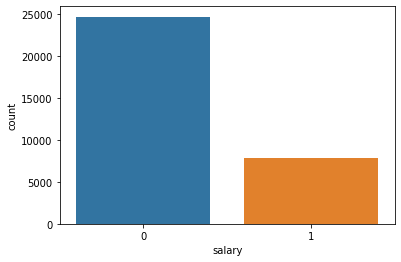

In [7]:
sns.countplot(df['salary'])

### Good Luck !!!

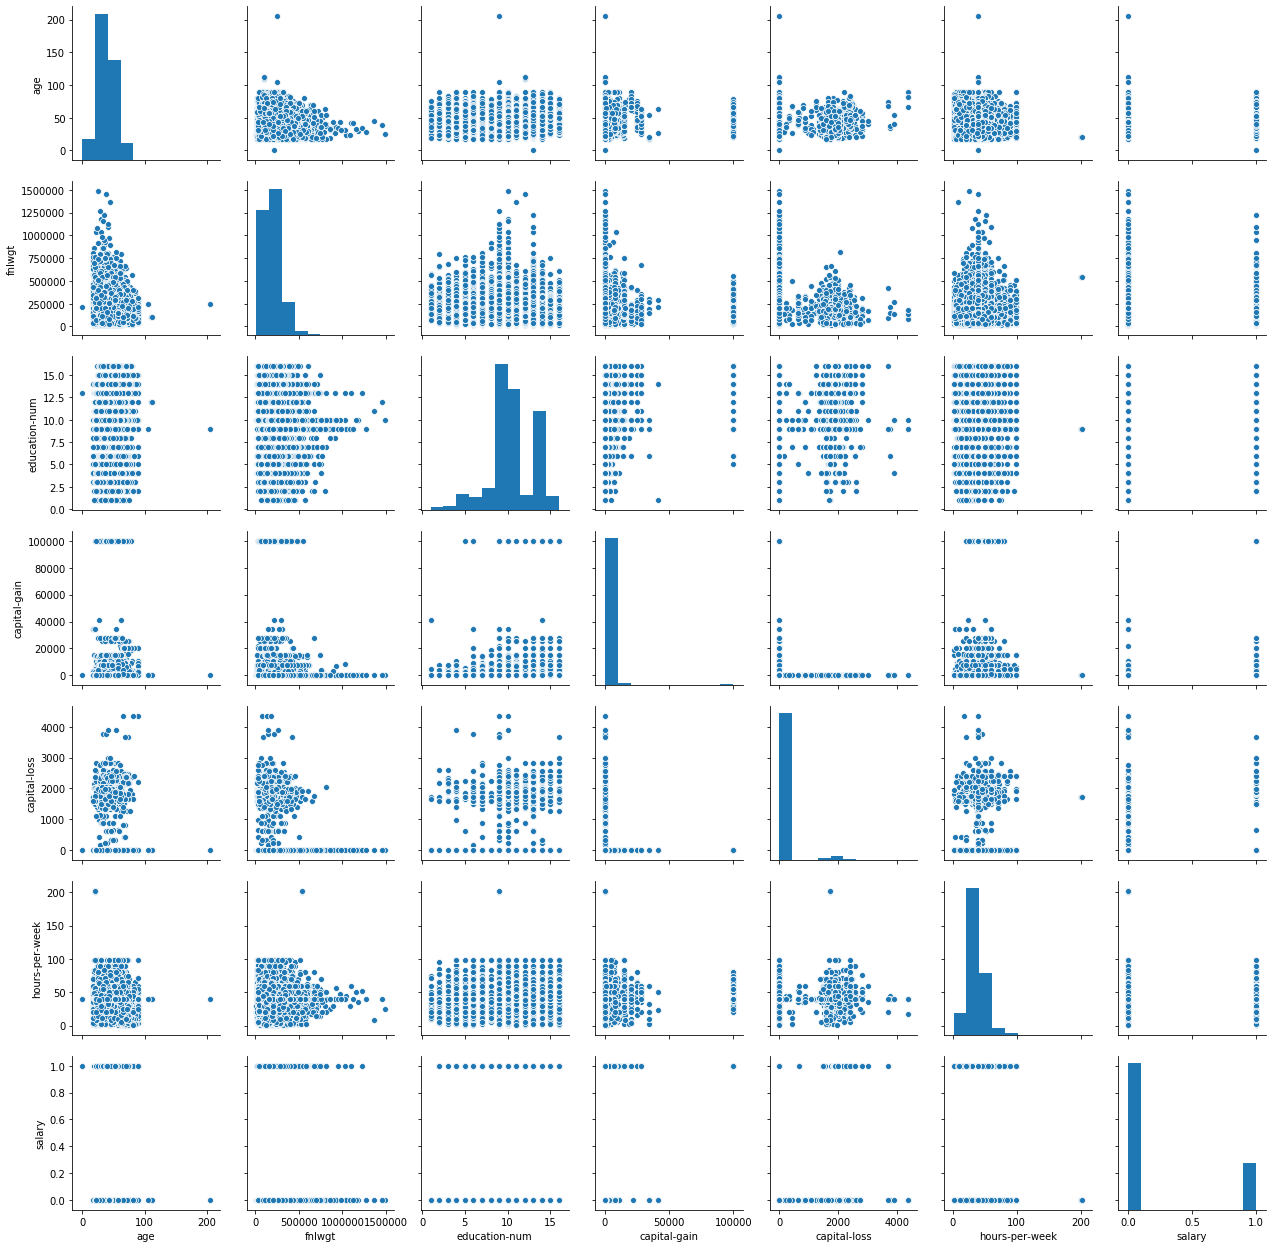

In [8]:
sns.pairplot(df)

In [9]:
df.shape

(32570, 15)

Show all your work below

In [10]:
#We have no Nulls :D 
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

In [11]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
count,32570.000000,3.257000e+04,32570.000000,32570.000000,32570.000000,32570.000000,32570.000000
mean,38.592662,1.898072e+05,10.080780,1077.351059,87.438041,40.452165,0.240774
std,13.694998,1.055938e+05,2.572517,7384.293326,403.210485,12.441520,0.427560
min,0.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178188e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783765e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370748e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,205.000000,1.484705e+06,16.000000,99999.000000,4356.000000,202.000000,1.000000


In [12]:
df.groupby('salary').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
salary,,,,,,
0,36.800388,190377.594791,9.595236,148.704343,53.334277,38.860118
1,44.244198,188008.678398,11.611834,4005.631599,194.976664,45.472328


In [13]:
#There is 3 times as many people who make less than 80k. We got lot more data on peopole who dont make more than 80k
df.salary.value_counts()

0    24728
1     7842
Name: salary, dtype: int64

### Visualizing the Data (EDA)

count    32570.000000
mean        38.592662
std         13.694998
min          0.000000
25%         28.000000
50%         37.000000
75%         48.000000
max        205.000000
Name: age, dtype: float64


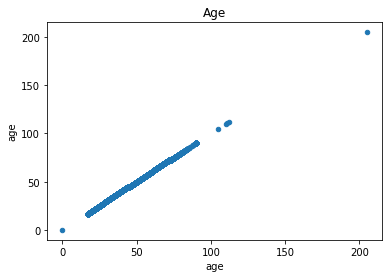

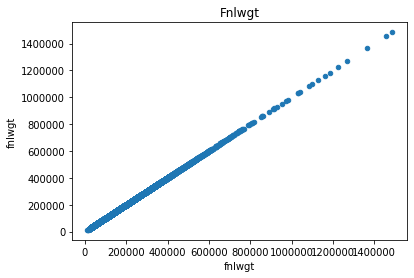

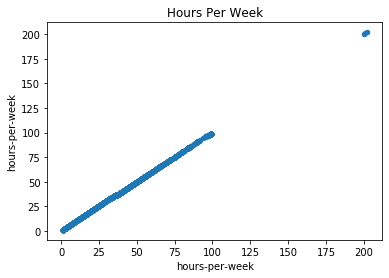

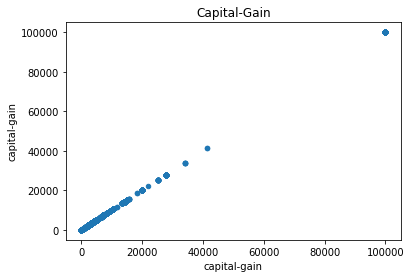

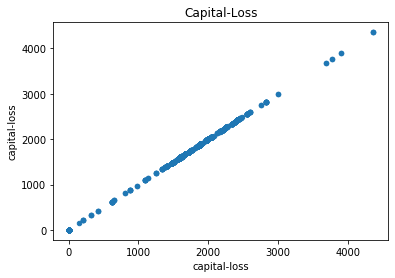

In [14]:
df.plot.scatter(x='age',y='age')
print(df.age.describe())
plt.title("Age")
plt.show()
df.plot.scatter(x='fnlwgt',y='fnlwgt')
df.fnlwgt.describe()
plt.title("Fnlwgt")
plt.show()
df.plot.scatter(x='hours-per-week',y='hours-per-week')
plt.title("Hours Per Week")
plt.show()
df.plot.scatter(x='capital-gain',y='capital-gain')
plt.title("Capital-Gain")
plt.show()
df.plot.scatter(x='capital-loss', y='capital-loss')
plt.title("Capital-Loss")
plt.show()






### Removing outliers

In [15]:
cleandf = df[df.age < 100 ]
cleandf = cleandf[df['hours-per-week'] < 100]
cleandf = cleandf[df['capital-gain'] < 60000]

count    32570.000000
mean        38.592662
std         13.694998
min          0.000000
25%         28.000000
50%         37.000000
75%         48.000000
max        205.000000
Name: age, dtype: float64


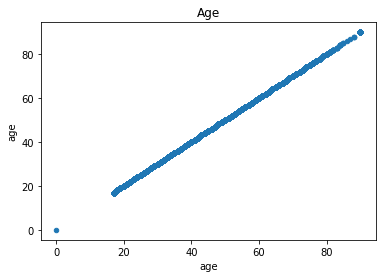

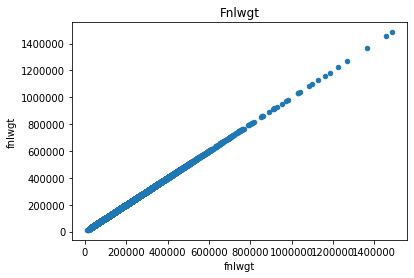

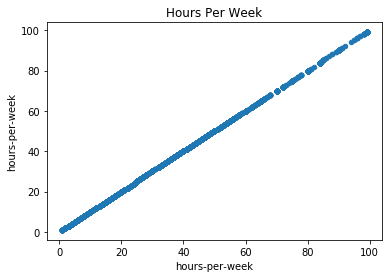

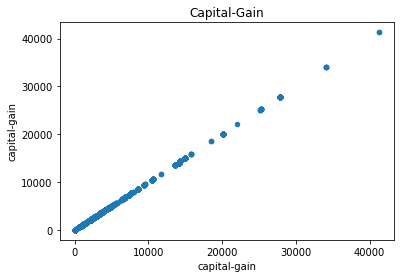

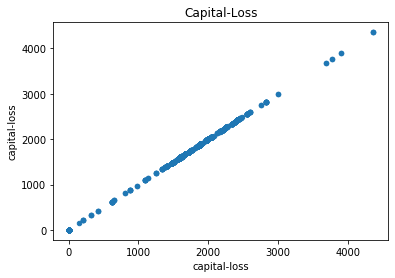

In [16]:
cleandf.plot.scatter(x='age',y='age')
print(df.age.describe())
plt.title("Age")
plt.show()
cleandf.plot.scatter(x='fnlwgt',y='fnlwgt')
cleandf.fnlwgt.describe()
plt.title("Fnlwgt")
plt.show()
cleandf.plot.scatter(x='hours-per-week',y='hours-per-week')
plt.title("Hours Per Week")
plt.show()
cleandf.plot.scatter(x='capital-gain',y='capital-gain')
plt.title("Capital-Gain")
plt.show()
df.plot.scatter(x='capital-loss', y='capital-loss')
plt.title("Capital-Loss")
plt.show()




In [17]:
for col in df.columns: 
    print(col) 

age
workclass
fnlwgt
education
education-num
marital-status
occupation
relationship
race
sex
capital-gain
capital-loss
hours-per-week
native-country
salary


In [17]:
#sns.pairplot(data = cleandf)

In [18]:
cleandf.salary.value_counts()

0    24720
1     7683
Name: salary, dtype: int64

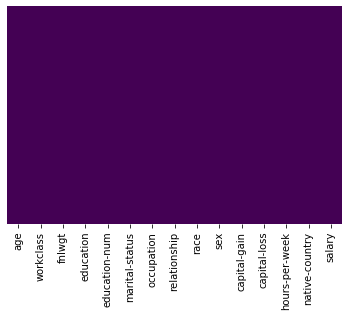

In [19]:
sns.heatmap(cleandf.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [20]:
cleandf.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Logistic Regression Without DummyVar

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleandf['hours-per-week'].values.reshape(-1,1),cleandf['salary'],test_size=0.20, random_state=101)

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      4912
           1       0.35      0.04      0.07      1569

    accuracy                           0.75      6481
   macro avg       0.55      0.51      0.46      6481
weighted avg       0.66      0.75      0.66      6481

0.7498842771177288


## Logistic Regression With DummyVar

In [24]:
cleandf


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32565,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32566,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32567,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32568,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [25]:
education = pd.get_dummies(cleandf['education'],drop_first=True)
education.head()

,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [26]:
workclass = pd.get_dummies(cleandf['workclass'],drop_first=True)
workclass.head()

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0


In [27]:
marital_status = pd.get_dummies(cleandf['marital-status'],drop_first=True)
marital_status.head()

,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [28]:
sex = pd.get_dummies(cleandf['sex'],drop_first=True)
sex.head()

,Male
0,1
1,1
2,1
3,1
4,0


In [29]:

relationship = pd.get_dummies(cleandf['relationship'],drop_first=True)
relationship.head()

,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [30]:


race = pd.get_dummies(cleandf['race'],drop_first=True)
race.head()

,Asian-Pac-Islander,Black,Other,White
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [31]:

native_country = pd.get_dummies(cleandf['native-country'],drop_first=True)
native_country.head()

,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
occupation = pd.get_dummies(cleandf['occupation'],drop_first=True)
occupation.head()

,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [33]:
features = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

currentdData = cleandf[features]


### Took care of categorical variables 

In [34]:
currentData= pd.concat([cleandf[features],relationship,sex,marital_status,workclass,education,occupation,race,native_country],axis=1)

In [35]:
currentData.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Not-in-family,Other-relative,Own-child,Unmarried,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,77516,13,2174,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
cleandf['salary']


0        0
1        0
2        0
3        0
4        0
        ..
32565    0
32566    1
32567    0
32568    0
32569    1
Name: salary, Length: 32403, dtype: int64

In [37]:
currentData

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Not-in-family,Other-relative,Own-child,Unmarried,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,77516,13,2174,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32565,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32566,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32567,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32568,22,201490,9,0,0,20,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
currentData.count()

age                32403
fnlwgt             32403
education-num      32403
capital-gain       32403
capital-loss       32403
                   ...  
Thailand           32403
Trinadad&Tobago    32403
United-States      32403
Vietnam            32403
Yugoslavia         32403
Length: 100, dtype: int64

## My Model for Logistic Regression

In [39]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(currentData,cleandf['salary'],test_size=0.20, random_state=101)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      4912
           1       0.73      0.25      0.38      1569

    accuracy                           0.80      6481
   macro avg       0.76      0.61      0.63      6481
weighted avg       0.78      0.80      0.76      6481

0.7961734300262305


### REALLY BAD Model for Linear Regression (IGNORE)

In [40]:
#Just Testing how bad LinearRegression is for this data. 

X = currentData['age'].values.reshape(-1,1)
Y = cleandf['salary'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20, random_state=101)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared:', metrics.r2_score(y_test, predictions))


Root Mean Squared Error: 0.4160921810555295
R-squared: 0.0564132127991549


## My Model for Logistic Regression

In [ ]:
#This was taking way too long

# X_train, X_test, y_train, y_test = train_test_split(currentData,cleandf['salary'],test_size=0.20, random_state=101)
# model = svm.SVC(kernel = 'linear')
# model.fit(X_train, y_train)
# predictions = model.predict(X_test)
# print(classification_report(y_test,predictions))
# print(accuracy_score(y_test, predictions))



In [43]:
smallerData =  pd.concat([cleandf[features],education],axis=1)
X_train, X_test, y_train, y_test = train_test_split(smallerData,cleandf['salary'],test_size=0.20, random_state=101)
model = svm.SVC(kernel = 'rbf', C=1, gamma=2**-5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))



              precision    recall  f1-score   support

           0       0.76      0.99      0.86      4912
           1       0.45      0.03      0.05      1569

    accuracy                           0.76      6481
   macro avg       0.61      0.51      0.45      6481
weighted avg       0.69      0.76      0.66      6481

0.7565190557012806


In [44]:

X_train, X_test, y_train, y_test = train_test_split(currentData,cleandf['salary'],test_size=0.20, random_state=101)
model = svm.SVC(kernel = 'rbf', C=1, gamma=2**-5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))




              precision    recall  f1-score   support

           0       0.76      0.99      0.86      4912
           1       0.48      0.02      0.04      1569

    accuracy                           0.76      6481
   macro avg       0.62      0.51      0.45      6481
weighted avg       0.69      0.76      0.66      6481

0.7574448387594507


In [90]:
X_train, X_test, y_train, y_test = train_test_split(currentData,cleandf['salary'],test_size=0.20, random_state=101)
model = DecisionTreeClassifier(max_depth=11, criterion='gini')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4912
           1       0.78      0.58      0.67      1569

    accuracy                           0.86      6481
   macro avg       0.83      0.77      0.79      6481
weighted avg       0.85      0.86      0.85      6481

0.8588180836290696


## My Decision Trees Classifier  86%

In [91]:
X_train, X_test, y_train, y_test = train_test_split(currentData,cleandf['salary'],test_size=0.20, random_state=101)
model = DecisionTreeClassifier(max_depth=9, criterion='entropy')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4912
           1       0.79      0.57      0.66      1569

    accuracy                           0.86      6481
   macro avg       0.83      0.76      0.79      6481
weighted avg       0.85      0.86      0.85      6481

0.860052461039963


In [117]:
#Afeature= pd.concat([Afeature,cleandf['salary']],axis=1)
#Afeature = list(currentData.columns[1:])
type(cleandf['salary'])
Afeature = pd.concat([currentData,cleandf['salary']],axis =1)
fea = list(Afeature.columns[1:])

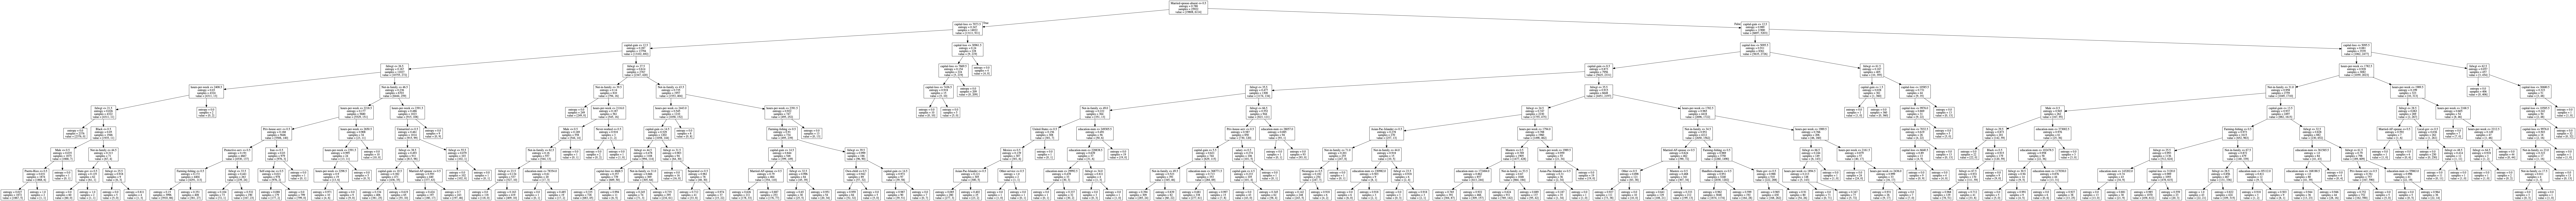

In [125]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import io
import pydot 
dot_data = StringIO()  
export_graphviz(model, out_file=dot_data, feature_names=fea)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())